In [1]:
#Import used
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0-rc1


In [3]:
test_results = {}
hists = {}

In [4]:
def plot_loss(history, titleString, learningRate, epoch):
    fig1, ax1 = plt.subplots()
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    print(min(history.history['loss']), max(history.history['loss']))
    ax1.set_ylim([min(min(history.history['val_loss']), min(history.history['loss'])), max(max(history.history['loss']), max(history.history['val_loss']))])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Error [Price]')
    ax1.set_title(f"{titleString} {learningRate} LR {epoch}E")
    ax1.legend()
    ax1.grid(True)
    fig1.savefig(f"DNN Results/Final {titleString} {learningRate} LR {epoch}E.png")

In [5]:
def runDNNModel(learningRate=0.05, fullData=False, epoch=30, kfold=False, train=None, test=None, i=0):
    if kfold:
        train_dataset = train
        test_dataset = test
        if fullData:
            titleString = f"DNN Full Dataset {i+1}th fold"
        else:
            titleString = f"DNN 15k+ Dataset {i+1}th fold"
    elif fullData:
        train_dataset = pd.read_csv("lr_nn_data/full_train.csv")
        test_dataset = pd.read_csv("lr_nn_data/full_test.csv")
        titleString = "DNN Full Dataset"
    else:
        train_dataset = pd.read_csv("lr_nn_data/above15k_train.csv")
        test_dataset = pd.read_csv("lr_nn_data/above15k_test.csv")
        titleString = "DNN 15k+ Dataset"

    train_dataset = train_dataset.drop(columns=train_dataset.columns[0])
    test_dataset = test_dataset.drop(columns=test_dataset.columns[0])
    
    #Establishes features and labels
    train_features = train_dataset.copy()
    test_features = test_dataset.copy()

    train_labels = train_features.pop('price')
    test_labels = test_features.pop('price')

    model_params = np.array(train_features)
    #Creates the normalizer for the parameters
    normalizer = tf.keras.layers.Normalization(input_shape=[len(train_dataset.columns) - 1,], axis=-1)
    normalizer.adapt(model_params) 

    #Creates the model with multiple layers,
    #This is something we can change, but for now it works and doesn't take too long
    linear_model = tf.keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    # linear_model.summary()

    #We can change the optimization model to something else Adam was just recommneded based on Tensor Flow's webiste on Linear Regression
    #Also the learning rate and loss can be changed as well but a 0.1 learning rate seemed a bit too high and caused validation to freak out
    linear_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learningRate),
        loss='mean_absolute_error')
    

    #Trains the model, we can change the number of epochs, but based on my running it appears to flatline around this value
    history = linear_model.fit(
        train_features,
        train_labels,
        epochs=epoch,
        # Suppress logging.
        verbose=0,
        # Calculate validation results on 20% of the training data.
        validation_split = 0.2)
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    test_result = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

    return (test_result, history, titleString, hist)

        

In [23]:
# fullData = True
# lr = 0.01
# epoch = 30

# test_result, hist = runDNNModel(lr, fullData, epoch)

In [24]:
# if fullData:
#     key = f"DNN Full Data {lr}LR {epoch}epoch"
# else:
#     key = f"DNN 15k+ Data {lr}LR {epoch}epoch"
    
# test_results[key] = test_result
# hists[key] = hist

# test_results

In [6]:
part1 = pd.read_csv("lr_nn_data/above15k_train.csv")
part2 = pd.read_csv("lr_nn_data/above15k_test.csv")

full = pd.concat([part1, part2], ignore_index=True)
full = full.sample(frac=1)

In [7]:
##Cross Validation for DNN 15k+ Dataset

def cross_validation(lr, epoch, cutOff):
    print(f"Testing Learning Rate {lr}")
    avgErrors = []
    histsForLR = []
    for i in range(4,5):
        print(f"Testing the {i+1}th fifth")
        test_dataset = full.iloc[i*cutOff:cutOff*(i+1)]
        train_dataset = full.drop(test_dataset.index)

        test_result, history, titleString, hist = runDNNModel(lr, False, epoch, kfold=True, train=train_dataset, test=test_dataset, i=i)
        plot_loss(history, titleString, lr, epoch)
        print(f"Error for lr {lr}, {i+1}th fifth is {test_result}")
        avgErrors.append(test_result)
        histsForLR.append(hist)
    finalError = sum(avgErrors) / 5
    return finalError, avgErrors, histsForLR
    

In [11]:
car = full.loc[0]
for col in full.columns:
    print(col)

Unnamed: 0
price
has_accidents
mileage
owner_count
year
4WD
4X2
AWD
FWD
RWD
AM General
Acura
Alfa Romeo
Aston Martin
Audi
BMW
Bentley
Buick
Cadillac
Chevrolet
Chrysler
Daewoo
Datsun
Dodge
FIAT
Ferrari
Fisker
Ford
GMC
Genesis
Geo
Honda
Hummer
Hyundai
INFINITI
Isuzu
Jaguar
Jeep
Karma
Kia
Lamborghini
Land Rover
Lexus
Lincoln
Lotus
MINI
Maserati
Maybach
Mazda
McLaren
Mercedes-Benz
Mercury
Mitsubishi
Nissan
Oldsmobile
Plymouth
Pontiac
Porsche
RAM
Rolls-Royce
SRT
Saab
Saturn
Scion
Subaru
Suzuki
Tesla
Toyota
Volkswagen
Volvo
smart
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
unique_number
Convertible
Coupe
Hatchback
Minivan
PickupTruck
SUV/Crossover
Sedan
Van
Wagon


In [8]:
epoch = 50
cverrors = {}
cvhists = {}
cutOff = math.floor(len(full) / 5)

Testing Learning Rate 0.1
Testing the 1th fifth
2134.210693359375 2880.96435546875
Error for lr 0.1, 1th fifth is 2084.562255859375
Testing the 2th fifth
2155.82275390625 2905.51416015625
Error for lr 0.1, 2th fifth is 2339.172607421875
Testing the 3th fifth
2176.083740234375 2921.588623046875
Error for lr 0.1, 3th fifth is 2118.308349609375
Testing the 4th fifth
2185.269287109375 3061.38427734375
Error for lr 0.1, 4th fifth is 2151.12939453125
Testing the 5th fifth
2146.288818359375 3208.614990234375
Error for lr 0.1, 5th fifth is 4873.7353515625


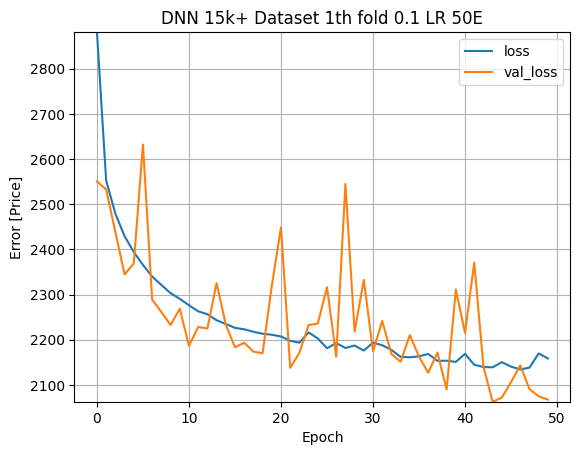

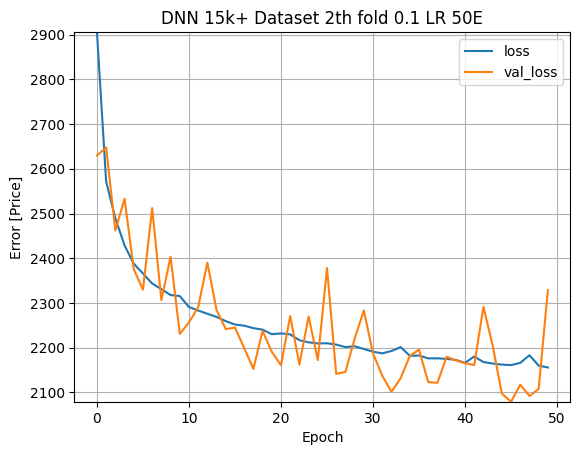

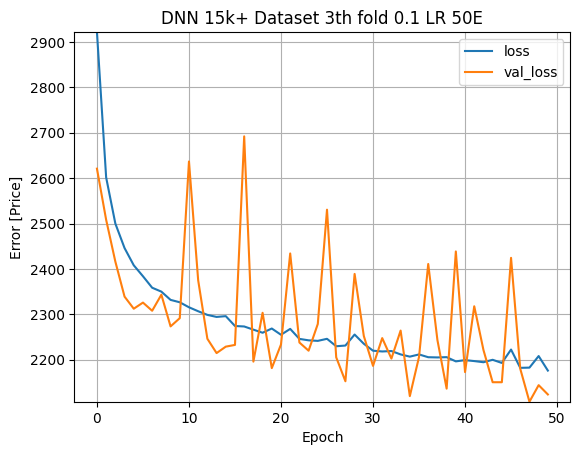

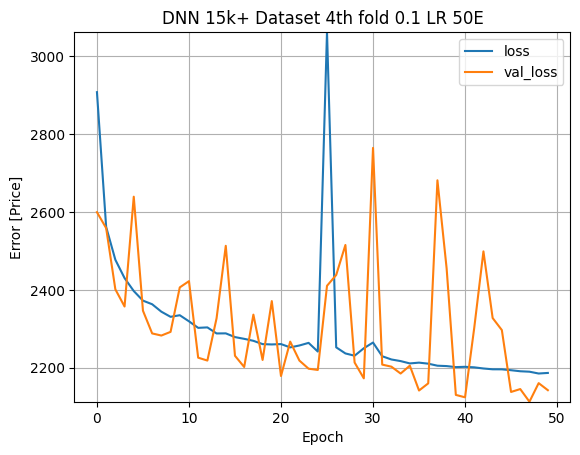

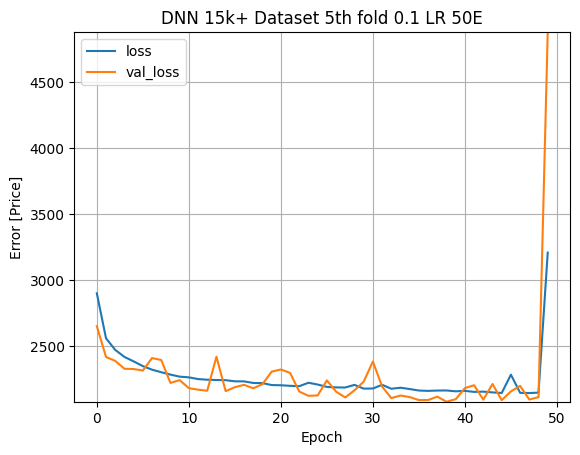

In [28]:
lr = 0.1
finalError, avgErrors, histsForLR = cross_validation(lr, epoch, cutOff)
cverrors[lr] = (finalError, avgErrors)
cvhists[lr] = histsForLR

Testing Learning Rate 0.075
Testing the 1th fifth
2129.66845703125 2890.369873046875
Error for lr 0.075, 1th fifth is 2147.48779296875
Testing the 2th fifth
2076.86669921875 2889.45458984375
Error for lr 0.075, 2th fifth is 2067.229736328125
Testing the 3th fifth
2130.474365234375 2853.158447265625
Error for lr 0.075, 3th fifth is 2147.23193359375
Testing the 4th fifth
2120.541259765625 2838.53564453125
Error for lr 0.075, 4th fifth is 2164.180908203125
Testing the 5th fifth
2093.219970703125 2878.583984375
Error for lr 0.075, 5th fifth is 2130.016357421875


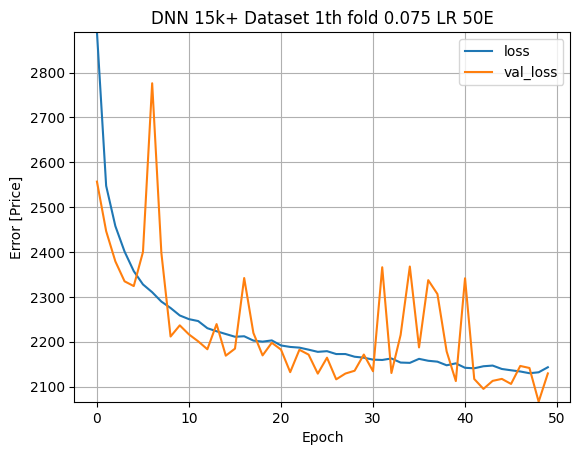

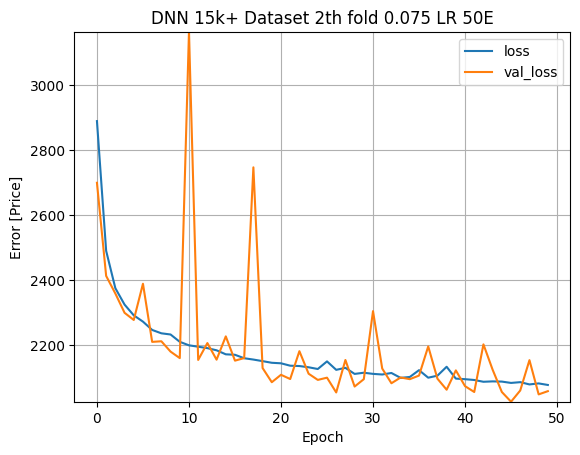

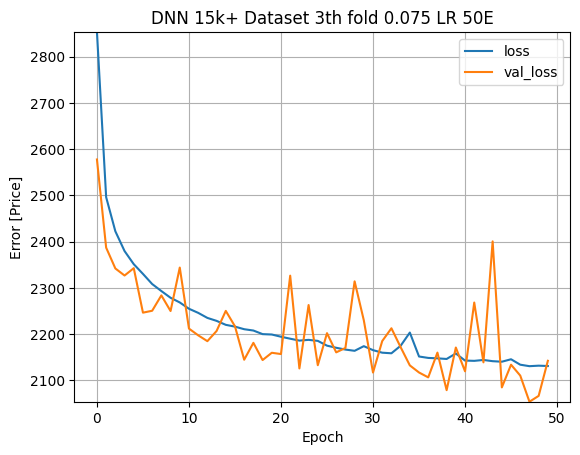

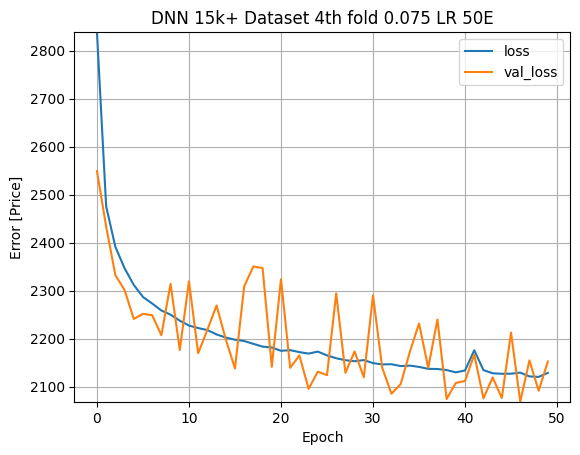

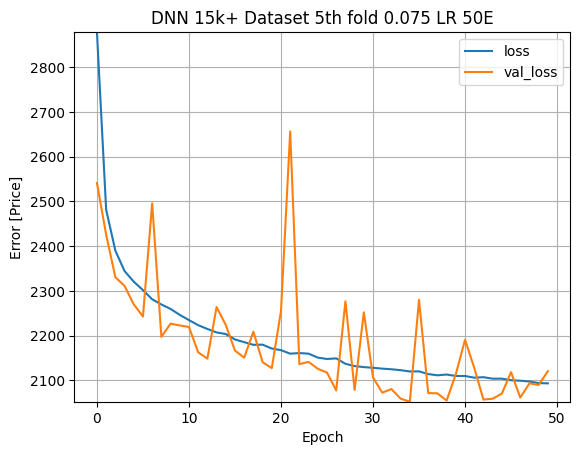

In [30]:
lr = 0.075
finalError, avgErrors, histsForLR = cross_validation(lr, epoch, cutOff)
cverrors[lr] = (finalError, avgErrors)
cvhists[lr] = histsForLR

Testing Learning Rate 0.05
Testing the 1th fifth
2031.178466796875 2816.99560546875
Error for lr 0.05, 1th fifth is 2045.0394287109375
Testing the 2th fifth
2044.9647216796875 2850.32861328125
Error for lr 0.05, 2th fifth is 3222.265625
Testing the 3th fifth
2035.6961669921875 2807.67431640625
Error for lr 0.05, 3th fifth is 2046.790283203125
Testing the 4th fifth
2025.54736328125 2853.8828125
Error for lr 0.05, 4th fifth is 2111.353271484375
Testing the 5th fifth
2039.4447021484375 2846.30810546875
Error for lr 0.05, 5th fifth is 1994.3153076171875


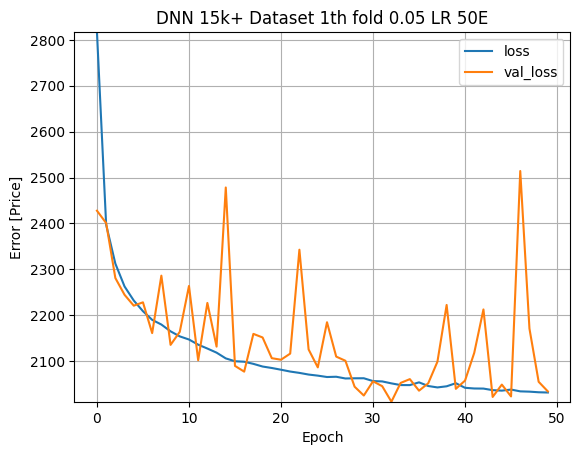

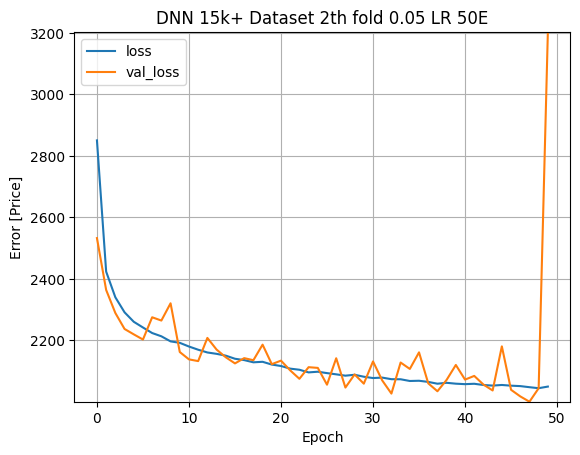

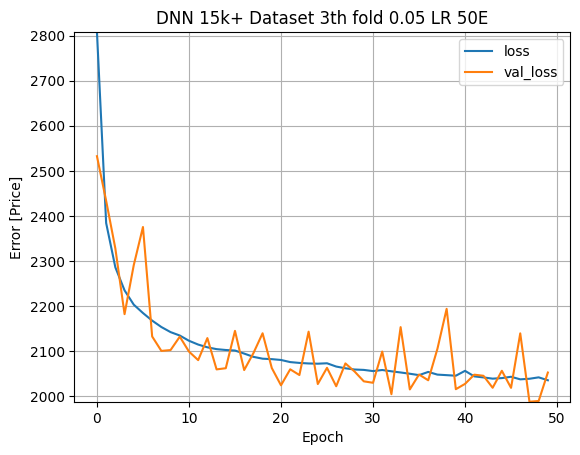

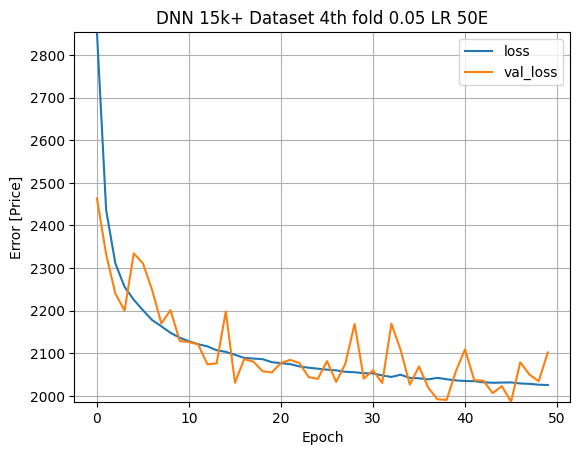

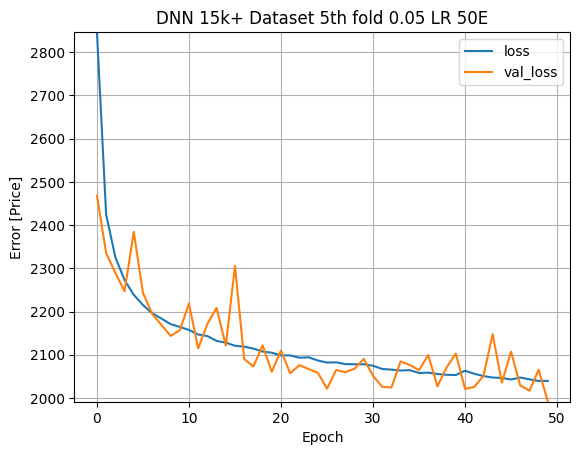

In [31]:
lr = 0.05
finalError, avgErrors, histsForLR = cross_validation(lr, epoch, cutOff)
cverrors[lr] = (finalError, avgErrors)
cvhists[lr] = histsForLR

Testing Learning Rate 0.01
Testing the 1th fifth
1850.384033203125 2833.14990234375
Error for lr 0.01, 1th fifth is 1905.9310302734375
Testing the 2th fifth
1882.8734130859375 2852.317626953125
Error for lr 0.01, 2th fifth is 1920.847412109375
Testing the 3th fifth
1865.5272216796875 2806.751708984375
Error for lr 0.01, 3th fifth is 1879.0093994140625
Testing the 4th fifth
1892.551513671875 2837.197265625
Error for lr 0.01, 4th fifth is 1920.607421875
Testing the 5th fifth
1860.6553955078125 2798.520751953125
Error for lr 0.01, 5th fifth is 1874.6431884765625


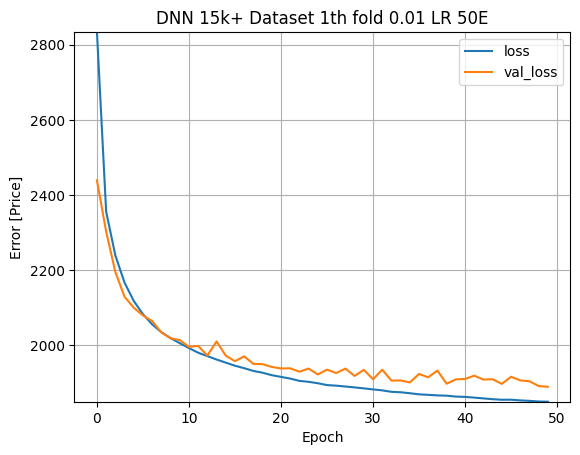

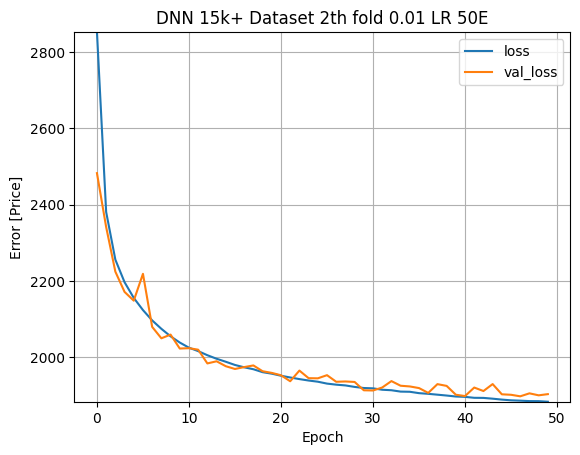

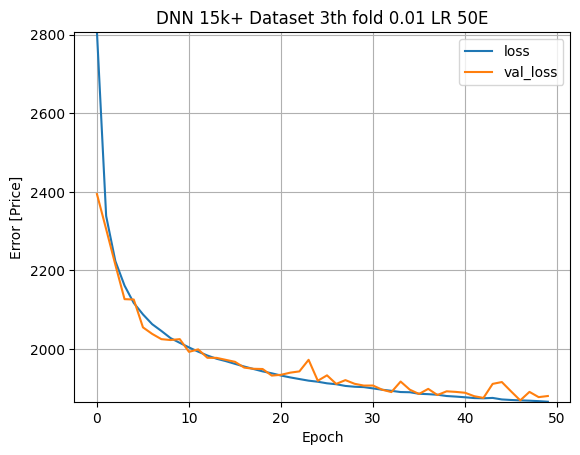

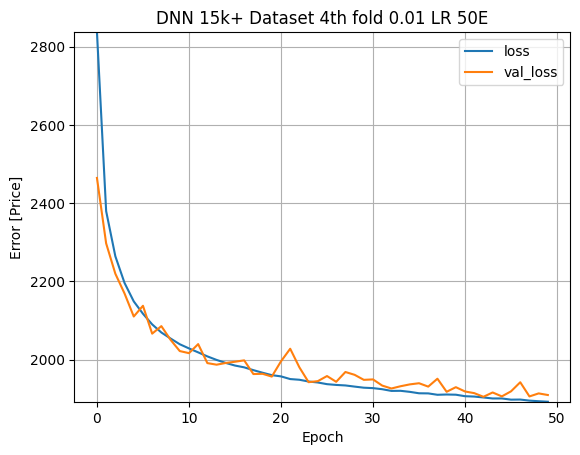

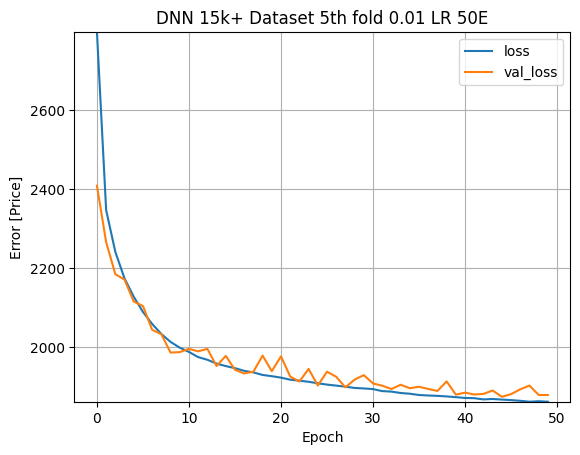

In [33]:
lr = 0.01
finalError, avgErrors, histsForLR = cross_validation(lr, epoch, cutOff)
cverrors[lr] = (finalError, avgErrors)
cvhists[lr] = histsForLR

Testing Learning Rate 0.005
Testing the 5th fifth
1874.7666015625 2957.6826171875
Error for lr 0.005, 5th fifth is 1885.2611083984375


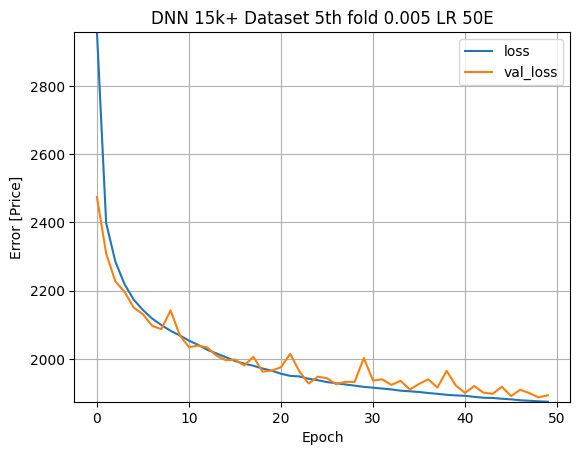

In [9]:
lr = 0.005
finalError, avgErrors, histsForLR = cross_validation(lr, epoch, cutOff)
cverrors[lr] = (finalError, avgErrors)
cvhists[lr] = histsForLR

In [11]:
cverrors = {}
##Need to manually add cverrors in because computer crashed in the middle and lost current variable state
l001 = [1905.9310302734375, 1920.847412109375, 1879.009399410625, 1920.607421875, 1874.6431884765625]
l0005 = [1965.200927734375, 1904.997314453125, 1882.8846435546875, 1876.6978759765625, 1885.2611083984375]
l005 = [2045.0394287109375, 3222.265625, 2046.790283203125, 2111.353271484375, 1994.3150376171875]
l0075 = [2147.48779296875, 2067.229736328125, 2147.23193359375, 2164.180908203125, 2130.016357421875]
l01 = [2084.562255859375, 2339.172607421875, 2118.308239609375, 2151.12939453125, 4873.7353515625]

cverrors[0.1] = (np.mean(l01), l01)
cverrors[0.075] = ((np.mean(l0075), l0075))
cverrors[0.05] = ((np.mean(l005), l005))
cverrors[0.01] = ((np.mean(l001), l001))
cverrors[0.005] = ((np.mean(l0005), l0005))

cverrors

{0.1: (2713.381569796875,
  [2084.562255859375,
   2339.172607421875,
   2118.308239609375,
   2151.12939453125,
   4873.7353515625]),
 0.075: (2131.229345703125,
  [2147.48779296875,
   2067.229736328125,
   2147.23193359375,
   2164.180908203125,
   2130.016357421875]),
 0.05: (2283.952729203125,
  [2045.0394287109375,
   3222.265625,
   2046.790283203125,
   2111.353271484375,
   1994.3150376171875]),
 0.01: (1900.207690429,
  [1905.9310302734375,
   1920.847412109375,
   1879.009399410625,
   1920.607421875,
   1874.6431884765625]),
 0.005: (1903.0083740234375,
  [1965.200927734375,
   1904.997314453125,
   1882.8846435546875,
   1876.6978759765625,
   1885.2611083984375])}

In [12]:
for lr in cverrors.keys():
    print(f"The avgerage error for learning rate {lr} is {cverrors[lr][0]}")

The avgerage error for learning rate 0.1 is 2713.381569796875
The avgerage error for learning rate 0.075 is 2131.229345703125
The avgerage error for learning rate 0.05 is 2283.952729203125
The avgerage error for learning rate 0.01 is 1900.207690429
The avgerage error for learning rate 0.005 is 1903.0083740234375


1856.03857421875 2806.32763671875


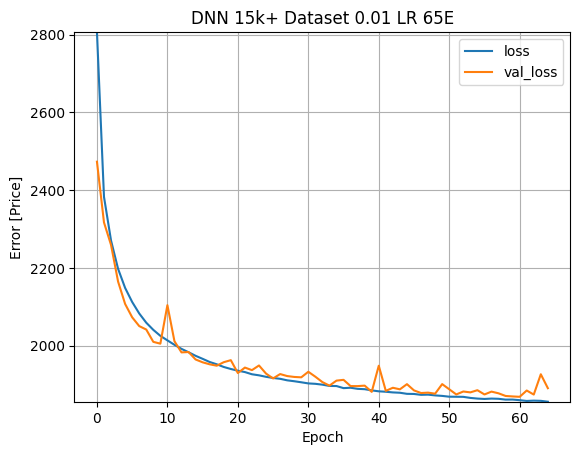

In [19]:
lr = 0.01
epoch = 65

test_result, history, titleString, hist = runDNNModel(lr, False, epoch, False, None, None, 0)
plot_loss(history, titleString, lr, epoch)
test_results[f"DNN 15k+ {lr}LR {epoch}E"] = test_result

1857.97216796875 2945.52587890625


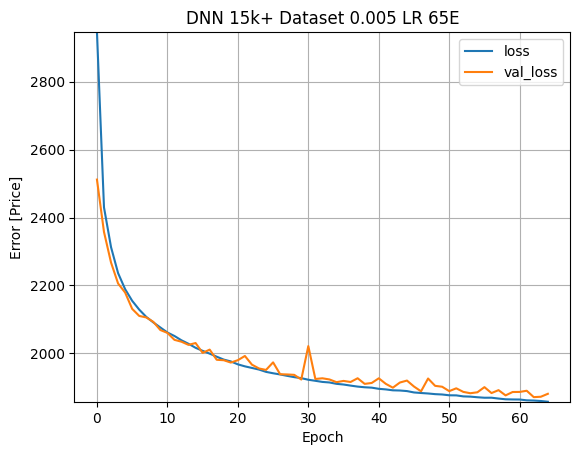

In [20]:
lr = 0.005
epoch = 65

test_result, history, titleString, hist = runDNNModel(lr, False, epoch, False, None, None, 0)
plot_loss(history, titleString, lr, epoch)
test_results[f"DNN 15k+ {lr}LR {epoch}E"] = test_result

In [21]:
test_results

{'DNN 15k+ 0.01LR 65E': 1927.2457275390625,
 'DNN 15k+ 0.005LR 65E': 1922.2044677734375}